In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df_train = pd.read_csv("./train .csv")
display(df_train.head())

,id,Age,Gender,T_Bil,D_Bil,ALP,ALT_GPT,AST_GOT,TP,Alb,AG_ratio,disease
0,0,60,Male,2.9,1.3,170.9,42.1,37.1,5.5,2.9,1.01,1
1,1,28,Female,0.7,0.1,158.8,26.0,23.9,6.4,3.7,1.36,0
2,2,60,Male,23.1,12.5,962.0,53.0,40.9,6.8,3.3,0.96,1
3,3,20,Male,1.0,0.5,415.9,33.9,39.0,7.0,3.8,1.31,0
4,4,44,Female,0.6,0.3,152.9,40.9,42.0,4.5,2.1,1.04,0


In [9]:
print(df_train.isna().sum())
print(df_train.info())
print(df_train.shape)

id          0
Age         0
Gender      0
T_Bil       0
D_Bil       0
ALP         0
ALT_GPT     0
AST_GOT     0
TP          0
Alb         0
AG_ratio    0
disease     0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        891 non-null    int64  
 1   Age       891 non-null    int64  
 2   Gender    891 non-null    object 
 3   T_Bil     891 non-null    float64
 4   D_Bil     891 non-null    float64
 5   ALP       891 non-null    float64
 6   ALT_GPT   891 non-null    float64
 7   AST_GOT   891 non-null    float64
 8   TP        891 non-null    float64
 9   Alb       891 non-null    float64
 10  AG_ratio  891 non-null    float64
 11  disease   891 non-null    int64  
dtypes: float64(8), int64(3), object(1)
memory usage: 83.7+ KB
None
(891, 12)


In [4]:
display(df_train[df_train["AG_ratio"].isna()])
df_train["AG_ratio"].fillna(df_train["Alb"] / (df_train["TP"] - df_train["Alb"]), inplace=True)
print(df_train.isna().sum())

,id,Age,Gender,T_Bil,D_Bil,ALP,ALT_GPT,AST_GOT,TP,Alb,AG_ratio,disease
31,31,75,Male,8.3,4.6,386.1,30.0,25.1,5.6,1.9,NaN,1
278,278,29,Male,1.3,0.3,75.0,25.0,26.0,5.2,2.8,NaN,1
495,495,49,Male,0.8,0.3,189.1,18.2,20.1,7.3,3.8,NaN,0
648,648,64,Male,0.8,0.2,199.0,19.1,22.2,6.2,3.6,NaN,0


0.9978579481397972
id          0
Age         0
Gender      0
T_Bil       0
D_Bil       0
ALP         0
ALT_GPT     0
AST_GOT     0
TP          0
Alb         0
AG_ratio    0
disease     0
dtype: int64


In [5]:
print(df_train.duplicated().sum())

0


In [6]:
print(df_train.describe(include='all'))

                id         Age Gender       T_Bil       D_Bil          ALP  \
count   891.000000  891.000000    891  891.000000  891.000000   891.000000   
unique         NaN         NaN      2         NaN         NaN          NaN   
top            NaN         NaN   Male         NaN         NaN          NaN   
freq           NaN         NaN    684         NaN         NaN          NaN   
mean    445.000000   43.340067    NaN    2.807856    1.256790   268.607071   
std     257.353842   16.647096    NaN    4.922115    2.578286   226.134887   
min       0.000000    3.000000    NaN    0.400000    0.100000    63.000000   
25%     222.500000   31.000000    NaN    0.800000    0.200000   170.450000   
50%     445.000000   44.000000    NaN    1.100000    0.400000   198.000000   
75%     667.500000   57.000000    NaN    2.100000    0.900000   279.000000   
max     890.000000   90.000000    NaN   43.200000   19.800000  2110.100000   

            ALT_GPT      AST_GOT          TP         Alb    AG_

In [14]:
df_train_0 = df_train[df_train["disease"]==0]
df_train_1 = df_train[df_train["disease"]==1]
display(df_train_0.head())
display(df_train_1.head())

,id,Age,Gender,T_Bil,D_Bil,ALP,ALT_GPT,AST_GOT,TP,Alb,AG_ratio,disease
1,1,28,Female,0.7,0.1,158.8,26.0,23.9,6.4,3.7,1.36,0
3,3,20,Male,1.0,0.5,415.9,33.9,39.0,7.0,3.8,1.31,0
4,4,44,Female,0.6,0.3,152.9,40.9,42.0,4.5,2.1,1.04,0
7,7,37,Female,0.8,0.1,152.0,89.9,20.9,7.0,4.3,1.43,0
8,8,41,Male,0.9,0.2,114.0,20.9,22.9,7.0,3.1,1.04,0


,id,Age,Gender,T_Bil,D_Bil,ALP,ALT_GPT,AST_GOT,TP,Alb,AG_ratio,disease
0,0,60,Male,2.9,1.3,170.9,42.1,37.1,5.5,2.9,1.01,1
2,2,60,Male,23.1,12.5,962.0,53.0,40.9,6.8,3.3,0.96,1
5,5,62,Male,11.1,5.7,699.0,64.0,100.1,7.4,3.3,0.64,1
6,6,32,Male,12.4,6.0,514.9,48.1,92.1,6.5,2.5,0.81,1
9,9,14,Male,1.7,0.6,268.8,58.0,45.1,6.7,3.9,1.21,1


In [15]:
display(df_train["Gender"].value_counts())
display(df_train_0["Gender"].value_counts())
display(df_train_1["Gender"].value_counts())

Male      684
Female    207
Name: Gender, dtype: int64

Male      347
Female    113
Name: Gender, dtype: int64

Male      337
Female     94
Name: Gender, dtype: int64

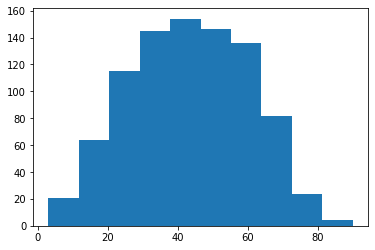

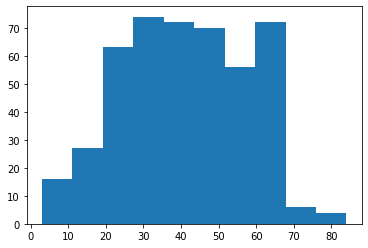

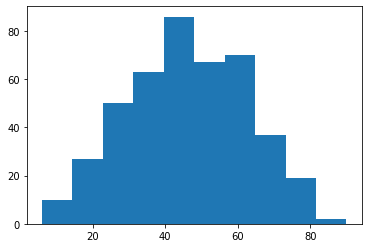

In [16]:
fig = plt.figure()
axes1 = fig.add_subplot(1,1,1)
axes1.hist(data=df_train,x="Age",bins=10)
plt.show()
fig = plt.figure()
axes1 = fig.add_subplot(1,1,1)
axes1.hist(data=df_train_0,x="Age",bins=10)
plt.show()
fig = plt.figure()
axes1 = fig.add_subplot(1,1,1)
axes1.hist(data=df_train_1,x="Age",bins=10)
plt.show()

In [17]:
print(df_train.corr())

                id       Age     T_Bil     D_Bil       ALP   ALT_GPT  \
id        1.000000  0.049873  0.005274  0.002191  0.004649 -0.008899   
Age       0.049873  1.000000  0.023838  0.022956  0.043923 -0.068371   
T_Bil     0.005274  0.023838  1.000000  0.992112  0.256488  0.256965   
D_Bil     0.002191  0.022956  0.992112  1.000000  0.254928  0.236076   
ALP       0.004649  0.043923  0.256488  0.254928  1.000000  0.096297   
ALT_GPT  -0.008899 -0.068371  0.256965  0.236076  0.096297  1.000000   
AST_GOT  -0.013150 -0.043663  0.355203  0.328497  0.116894  0.866955   
TP       -0.051528 -0.211715 -0.014836 -0.014602 -0.023761 -0.005689   
Alb      -0.050070 -0.261470 -0.230144 -0.224510 -0.154299 -0.010086   
AG_ratio -0.041471 -0.129721 -0.255273 -0.246936 -0.192997 -0.003419   
disease   0.009745  0.144898  0.373955  0.366597  0.274803  0.218902   

           AST_GOT        TP       Alb  AG_ratio   disease  
id       -0.013150 -0.051528 -0.050070 -0.041471  0.009745  
Age      -0.0

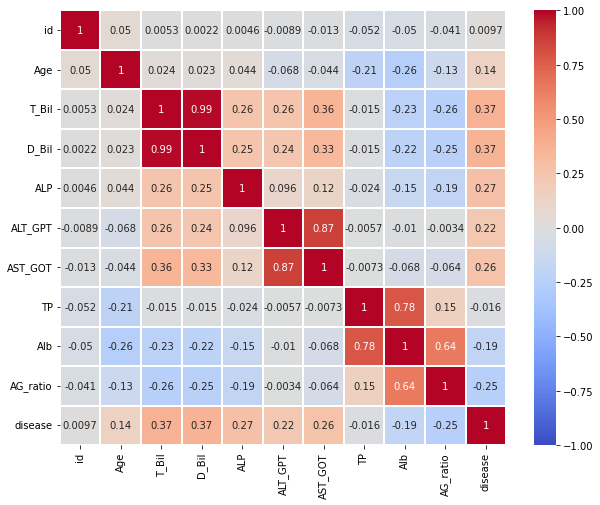

In [18]:
plt.figure(figsize=(10,8))
sns.heatmap(df_train.corr(), vmin=-1.0, vmax=1.0, annot=True, cmap='coolwarm', linewidths=0.1)
plt.show()

In [20]:
df_Gender = df_train["Gender"].apply(lambda x: 1 if x == 'Male' else 0)
print(df_Gender.head())

0    1
1    0
2    1
3    1
4    0
Name: Gender, dtype: int64


In [21]:
df_train["Gender"] = df_train["Gender"].apply(lambda x: 1 if x=="Male" else 0)
display(df_train.head())

,id,Age,Gender,T_Bil,D_Bil,ALP,ALT_GPT,AST_GOT,TP,Alb,AG_ratio,disease
0,0,60,1,2.9,1.3,170.9,42.1,37.1,5.5,2.9,1.01,1
1,1,28,0,0.7,0.1,158.8,26.0,23.9,6.4,3.7,1.36,0
2,2,60,1,23.1,12.5,962.0,53.0,40.9,6.8,3.3,0.96,1
3,3,20,1,1.0,0.5,415.9,33.9,39.0,7.0,3.8,1.31,0
4,4,44,0,0.6,0.3,152.9,40.9,42.0,4.5,2.1,1.04,0


In [22]:
df_X = df_train.drop(["disease"],axis=1)
df_y = df_train["disease"]
display(df_X.head())
display(df_y.head())


,id,Age,Gender,T_Bil,D_Bil,ALP,ALT_GPT,AST_GOT,TP,Alb,AG_ratio
0,0,60,1,2.9,1.3,170.9,42.1,37.1,5.5,2.9,1.01
1,1,28,0,0.7,0.1,158.8,26.0,23.9,6.4,3.7,1.36
2,2,60,1,23.1,12.5,962.0,53.0,40.9,6.8,3.3,0.96
3,3,20,1,1.0,0.5,415.9,33.9,39.0,7.0,3.8,1.31
4,4,44,0,0.6,0.3,152.9,40.9,42.0,4.5,2.1,1.04


0    1
1    0
2    1
3    0
4    0
Name: disease, dtype: int64

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve

In [26]:
X_train,X_test,y_train,y_test = train_test_split(df_X,df_y,random_state=0,test_size=0.3)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(623, 11)
(268, 11)
(623,)
(268,)


In [30]:
lr = LogisticRegression(max_iter=1500)
lr.fit(X_train,y_train)

LogisticRegression(max_iter=1500)

In [31]:
y_pred = lr.predict(X_test)
print(y_pred)

[0 0 0 1 0 0 0 1 1 0 0 1 1 1 0 0 0 1 1 1 0 1 0 1 1 0 0 1 0 1 0 0 0 0 0 0 1
 1 1 0 0 1 0 0 1 0 0 1 0 1 1 0 1 0 1 0 0 0 1 0 0 0 1 1 0 1 0 0 1 0 1 0 1 0
 0 1 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 1 1 1 0 0 0 0 1 0 0 1 0 0 1 1 0 1 0 1 0
 0 1 0 0 1 0 0 0 1 0 1 0 1 1 1 1 0 0 0 1 0 0 1 0 1 1 0 1 1 1 1 0 1 0 1 1 1
 0 0 0 1 1 0 0 0 0 0 0 1 0 1 1 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 1 0 1 0 0 0 1 0 0 0 0 1 0 0 1 0 1 1 0 1 1 1 1 0 0 0 0 1 1 0 0 1 0 0 0 0 0
 0 0 1 0 0 1 0 0 0 1 1 1 1 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 1 0 0 0 1 0
 1 0 0 0 1 1 1 0 0]


In [33]:
result=lr.predict_proba(X_test)[:,1]
print(result[:5])

[0.20239187 0.20423972 0.1908541  0.99957524 0.2475518 ]


                 predict_Positive  predict_Negative
actual_Positive                86                51
actual_Negative                16               115


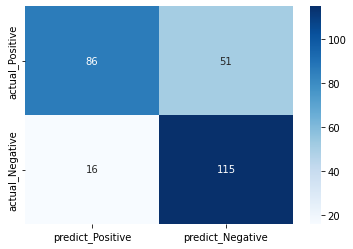

In [37]:
cm = confusion_matrix(y_true=y_test, y_pred=y_pred)
df_cm = pd.DataFrame(np.rot90(cm, 2), index=["actual_Positive", "actual_Negative"], columns=["predict_Positive", "predict_Negative"])
print(df_cm)
sns.heatmap(df_cm, annot=True, fmt="2g", cmap='Blues')
plt.yticks(va='center')
plt.show()

0.8492227113166546


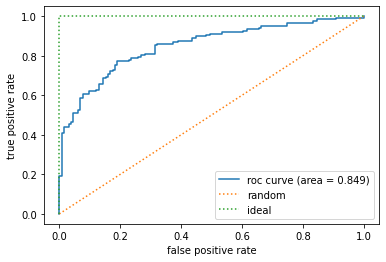

In [40]:
# モデルの予測（疾患あり(=1)に属する確率の算出）
y_pred_prob = lr.predict_proba(X_test)[:, 1]

# AUCスコアの算出
auc_score = roc_auc_score(y_true=y_test, y_score=y_pred_prob)
print(auc_score)

# ROC曲線の要素（偽陽性率、真陽性率、閾値）の算出
fpr, tpr, thresholds = roc_curve(y_true=y_test, y_score=y_pred_prob)

# ROC曲線の描画
plt.plot(fpr, tpr, label='roc curve (area = %0.3f)' % auc_score)
plt.plot([0, 1], [0, 1], linestyle=':', label='random')
plt.plot([0, 0, 1], [0, 1, 1], linestyle=':', label='ideal')
plt.legend()
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.show()